In [7]:
%%time
%matplotlib inline

import importlib
import new_import  

importlib.reload(new_import)


from new_import import *

CPU times: user 77.3 ms, sys: 257 µs, total: 77.5 ms
Wall time: 84.5 ms


In [8]:
%%time
# Cấu hình Daskgateway
cluster, client = notebook_utils.initialize_dask(use_gateway=True, workers=(1,10))
# Khai báo 1 Datacube là dc
dc = datacube.Datacube()

client

An existing cluster was found. Connecting to: easihub.6fc44d1e160e47d3a00bacef42e4cfcd
CPU times: user 31.8 ms, sys: 5.85 ms, total: 37.7 ms
Wall time: 183 ms


Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.asia.easi-eo.solutions/services/dask-gateway/clusters/easihub.6fc44d1e160e47d3a00bacef42e4cfcd/status,


In [9]:
# cấu hình thời gian lấy ảnh và tọa độ
date_range = ('2022-01-01', '2024-01-01')
longtitude_range = (105.5, 106.4)
latitude_range = (9.2, 10.0) 

coordinates = (longtitude_range, latitude_range)

In [10]:
# tải dữ liệu vh vv từ vệ tinh sentinel-1
dsvh, dsvv = load_data_sen1(dc, date_range, coordinates)

<xarray.Dataset>
Dimensions:      (time: 61, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-09T22:46:05.500000 ... 2023-12...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    vv           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    vh           (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [11]:
average_vh = calculate_average(dsvh, time_pattern='1M')
progress(average_vh)

VBox()

In [12]:
average_vv = calculate_average(dsvv, time_pattern='1M')
progress(average_vv)

VBox()

In [13]:
%%time
average_vh.compute()
average_vv.compute()

CPU times: user 15 s, sys: 11.3 s, total: 26.3 s
Wall time: 50.7 s


<xarray.DataArray 'vv' (time: 24, y: 8874, x: 9902)>
array([[[0.0594939 , 0.0594939 , 0.0600426 , ..., 0.21335518,
         0.21028385, 0.21028385],
        [0.05532332, 0.05532332, 0.05665917, ..., 0.23414078,
         0.23400061, 0.23400061],
        [0.05532332, 0.05532332, 0.05665917, ..., 0.23414078,
         0.23400061, 0.23400061],
        ...,
        [0.07700387, 0.07700387, 0.06768824, ..., 0.04451084,
         0.04451084, 0.04136296],
        [0.07700387, 0.07700387, 0.06768824, ..., 0.04451084,
         0.04451084, 0.04136296],
        [0.08587649, 0.08587649, 0.07254383, ..., 0.04363104,
         0.04363104, 0.03933171]],

       [[0.12745902, 0.12745902, 0.11876601, ..., 0.18365164,
         0.18676798, 0.18676798],
        [0.13656907, 0.13656907, 0.12424222, ..., 0.21333331,
         0.20873646, 0.20873646],
        [0.13656907, 0.13656907, 0.12424222, ..., 0.21333331,
         0.20873646, 0.20873646],
...
        [0.10796279, 0.10796279, 0.09982023, ..., 0.08806302,
         0.08806302, 0.08385915],
        [0.10796279, 0.10796279, 0.09982023, ..., 0.08806302,
         0.08806302, 0.08385915],
        [0.11910844, 0.11910844, 0.11037835, ..., 0.08958023,
         0.08958023, 0.08184986]],

       [[0.1656645 , 0.1656645 , 0.17356288, ..., 0.22618426,
         0.22395623, 0.22395623],
        [0.18225141, 0.18225141, 0.18543799, ..., 0.23708123,
         0.25178984, 0.25178984],
        [0.18225141, 0.18225141, 0.18543799, ..., 0.23708123,
         0.25178984, 0.25178984],
        ...,
        [0.10267364, 0.10267364, 0.09493736, ..., 0.06966466,
         0.06966466, 0.06327037],
        [0.10267364, 0.10267364, 0.09493736, ..., 0.06966466,
         0.06966466, 0.06327037],
        [0.10988852, 0.10988852, 0.098445  , ..., 0.06458907,
         0.06458907, 0.06159769]]], dtype=float32)
Coordinates:
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
  * time         (time) datetime64[ns] 2022-01-31 2022-02-28 ... 2023-12-31
Attributes:
    units:         intensity
    nodata:        nan
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [15]:
data_sen2 = load_data_sen2(dc, date_range, coordinates)
notebook_utils.heading(notebook_utils.xarray_object_size(data_sen2))
display(data_sen2)

Mix of datasets found with either offset required or not.
We will load two xarrays, apply offset where required, and merge into one xarray.
The valid_data_mask, scale and offset have been applied to the reflectance bands


<xarray.Dataset>
Dimensions:      (time: 283, y: 8874, x: 9902)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-02T03:25:18.223000 ... 2023-12...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
Data variables:
    red          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    nir          (time, y, x) float32 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
    scl          (time, y, x) uint8 dask.array<chunksize=(1, 2048, 2048), meta=np.ndarray>
Attributes:
    crs:           EPSG:32648
    grid_mapping:  spatial_ref

In [16]:
%%time
# Tiến hành loại bỏ các vị trí bị mây ảnh hưởng
result = mask_cloud(data_sen2)
progress(result)

{'0': 'no data',
 '1': 'saturated or defective',
 '2': 'dark area pixels',
 '3': 'cloud shadows',
 '4': 'vegetation',
 '5': 'bare soils',
 '6': 'water',
 '7': 'unclassified',
 '8': 'cloud medium probability',
 '9': 'cloud high probability',
 '10': 'thin cirrus',
 '11': 'snow or ice'}

CPU times: user 3.74 s, sys: 91.7 ms, total: 3.83 s
Wall time: 3.83 s


/env/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 15.30 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


VBox()

In [17]:
# calculate NDVI
dsNDVI = calculate_indices(result, index='NDVI', satellite_mission='s2')
ndvi = dsNDVI["NDVI"]
display(ndvi)


<xarray.DataArray 'NDVI' (time: 283, y: 8874, x: 9902)>
dask.array<truediv, shape=(283, 8874, 9902), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2022-01-02T03:25:18.223000 ... 2023-12...
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648

In [18]:
%%time
# calculate average NDVI
average_ndvi = calculate_average(ndvi,time_pattern="1M")
progress(average_ndvi)

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 1.1 s


VBox()

In [19]:
average_ndvi = average_ndvi.compute()

In [20]:
average_ndvi.isel(time=0)

<xarray.DataArray 'NDVI' (y: 8874, x: 9902)>
array([[ 0.8332344 ,  0.8348371 ,  0.829458  , ...,  0.81991786,
         0.81916034,  0.74777603],
       [ 0.8347787 ,  0.8330571 ,  0.83702826, ...,  0.82349646,
         0.83208674,  0.7846005 ],
       [ 0.8326533 ,  0.835594  ,  0.83999866, ...,  0.8094824 ,
         0.8142527 ,  0.8119837 ],
       ...,
       [ 0.11268017,  0.30408564,  0.07476228, ..., -0.3002948 ,
        -0.30792144, -0.32526052],
       [ 0.05448369,  0.34941897,  0.24396421, ..., -0.3309656 ,
        -0.30893144, -0.3015379 ],
       [ 0.00603658,  0.3505805 ,  0.3529612 , ..., -0.31064895,
        -0.3103048 , -0.31114948]], dtype=float32)
Coordinates:
  * y            (y) float64 1.106e+06 1.106e+06 ... 1.017e+06 1.017e+06
  * x            (x) float64 5.548e+05 5.548e+05 ... 6.538e+05 6.538e+05
    spatial_ref  int32 32648
    time         datetime64[ns] 2022-01-31

#####################################################################################

In [ ]:
train_path = "train/ST_training data_updated_1130points.shp"
# train_path = "train/updated_data/ThuanHoa_DKS_Kappa.shp"
ground_points = load_data_geo(train_path)
ground_points

In [50]:
fill_nan_model = joblib.load('model_train/regressor/500points/fill_nan_model_rf.pkl')

In [51]:

def extract_data_with_HTcode(ground_points, average_ndvi, dsvh, dsvv):
    datasets = {}
    
    for idx, point in ground_points.iterrows():
        
        # Ensure each HT_code has its own dictionary
        if point.Code not in datasets:
            datasets[point.Code] = {'ndvi': [], 'vh': [], 'vv': []}
        
        # Get the data for this point
        ndvi_data = average_ndvi.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        vh_data = dsvh.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        vv_data = dsvv.sel(x=point.geometry.x, y=point.geometry.y, method='nearest').values
        
        # Append the data to the lists for this HT_code
        datasets[point.Code]['ndvi'].append(ndvi_data)
        datasets[point.Code]['vh'].append(vh_data)
        datasets[point.Code]['vv'].append(vv_data)
    
    return datasets

In [ ]:
data = extract_data_with_HTcode(ground_points, average_ndvi, average_vh, average_vv)
data

In [27]:
# Assuming 'data' is the output of the function
ht_code = 6  # Replace with the specific HT code you want to extract
index = 3  # Replace with the index of the point you want to access (if multiple points are available)

# Extract the NDVI, VH, and VV values for that HT_code
ndvi_values = data[ht_code]['ndvi'][index]
vh_values = data[ht_code]['vh'][index]
vv_values = data[ht_code]['vv'][index]

# print("NDVI Values:", ndvi_values)
# print("VH Values:", vh_values)
# print("VV Values:", vv_values)

In [30]:
print(data[ht_code]['vv'][index].shape)

(24,)


In [24]:
input_data = np.column_stack((vh_values, vv_values))

# Make predictions for each month
predicted_ndvi = fill_nan_model.predict(input_data)

# Print the predictions
print("Predicted NDVI for each month:", predicted_ndvi)

Predicted NDVI for each month: [ 0.06312955  0.09415734 -0.03931203  0.03684363  0.09415734  0.05218117
  0.12209591  0.02450439  0.22320638  0.12704407  0.02172458 -0.02410148
  0.06312955  0.06312955 -0.0059255  -0.04951958  0.52021209  0.15721783
  0.31485855  0.07726408  0.14330875  0.21235545  0.05662697  0.08668071]


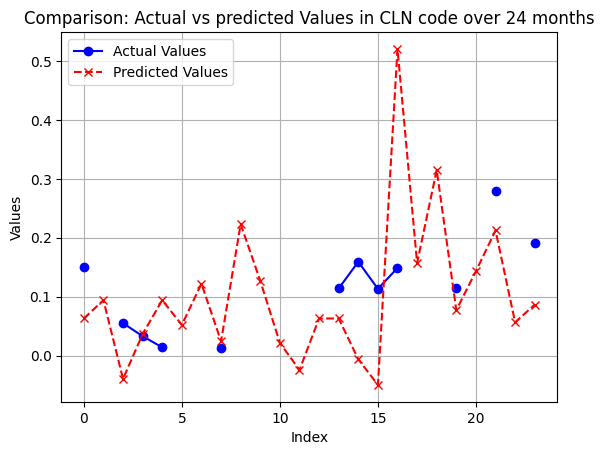

In [25]:
plt.plot(ndvi_values, marker='o', linestyle='-', color='b', label='Actual Values')

# Plotting the adjusted values
plt.plot(predicted_ndvi, marker='x', linestyle='--', color='r', label='Predicted Values')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison: Actual vs predicted Values in CLN code over 24 months')
# Adding grid
plt.grid(True)
# Adding legend to differentiate the lines
plt.legend()
# # # Adjusting the limits of the axes
# plt.xlim(0, 75)  # Example: Setting x-axis limits from 0 to 12
# plt.ylim(-1, 1)   # Example: Setting y-axis limits from 0 to 1
# Display the plot
plt.show()

In [ ]:
# cấu hình nhãn dữ liệu
label_mapping = {
    "Lua tom": "0",
    "Lua": "1",
    "CHN": "2",
    "CLN": "3",
    "TS": "4",
    "Song": "5",
    "Dat xay dung": "6",
    "Rung": "7"
}

In [37]:
def draw(ndvi_values, predicted_ndvi, name):
    plt.plot(ndvi_values, marker='o', linestyle='-', color='b', label='Actual Values')
    plt.plot(predicted_ndvi, marker='x', linestyle='--', color='r', label='Predicted Values')
    # Adding labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'Comparison: Actual vs predicted Values in {name} code over 24 months')
    # Adding grid
    plt.grid(True)
    # Adding legend to differentiate the lines
    plt.legend()
    # # # Adjusting the limits of the axes
    plt.xlim(0, 25)  # Example: Setting x-axis limits from 0 to 12
    plt.ylim(-1, 1)   # Example: Setting y-axis limits from 0 to 1
    # Display the plot
    plt.show()

In [35]:
def show_images (ht_code, index, name):
    ndvi_values = data[ht_code]['ndvi'][index]
    vh_values = data[ht_code]['vh'][index]
    vv_values = data[ht_code]['vv'][index]
    input_data = np.column_stack((vh_values, vv_values))
    predicted_ndvi = fill_nan_model.predict(input_data)
    draw(ndvi_values, predicted_ndvi, name)
    

In [ ]:
for i in range(50):
    show_images(4, i, 'TS')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


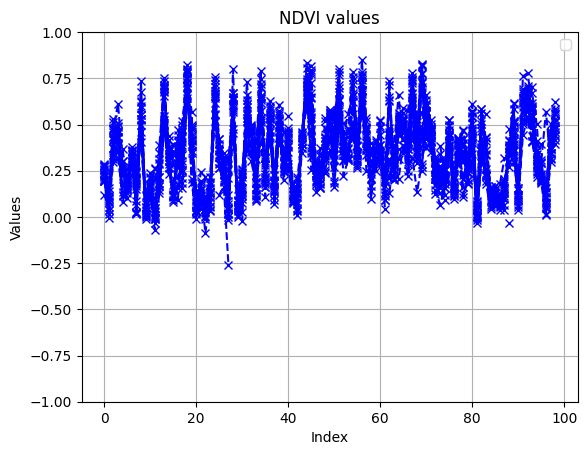

In [70]:
plt.plot(data[6]['ndvi'], marker='x', linestyle='--', color='b')
    # Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title(f'NDVI values')
# Adding grid
plt.grid(True)
# Adding legend to differentiate the lines
plt.legend()
# # # Adjusting the limits of the axes
# plt.xlim(0, 25)  # Example: Setting x-axis limits from 0 to 12
plt.ylim(-1, 1)   # Example: Setting y-axis limits from 0 to 1
# Display the plot
plt.show()

(24,)